In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

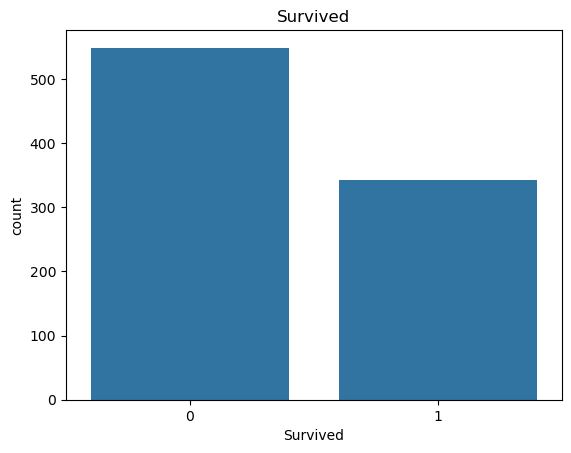

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df['Survived'])
plt.title('Survived')
plt.show()

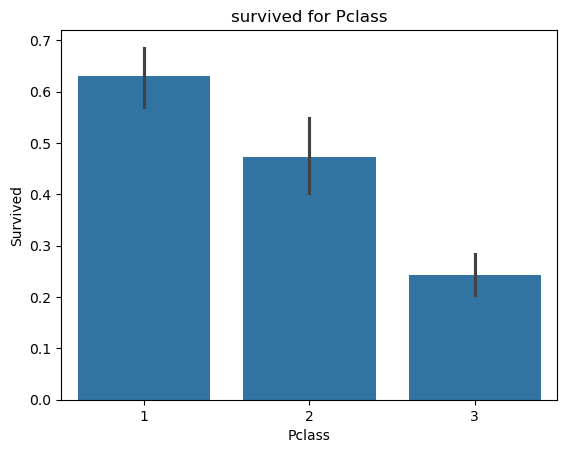

In [7]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('survived for Pclass')
plt.show()

In [8]:
df['Age'].fillna(df[ 'Age'].median(), inplace=True)
df.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)
df.dropna(inplace=True)
df.head()

C:\Users\shaya\AppData\Local\Temp\ipykernel_2692\2871696893.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df[ 'Age'].median(), inplace=True)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [11]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [12]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [14]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [15]:
model = RandomForestClassifier()

In [16]:
print(X.dtypes)

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked_Q        bool
Embarked_S        bool
dtype: object


In [17]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [18]:
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

0.7921348314606742


In [19]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [20]:
df['AgeCategory'] = pd.cut(df['Age'], bins=[0, 12, 18, 40, 60, 100], labels=[0, 1, 2, 3, 4])
df['AgeCategory'] = df['AgeCategory'].astype(int)

In [21]:
df['FareCategory'] = pd.qcut(df['Fare'], 4, labels=[0, 1, 2, 3])
df['FareCategory'] = df['FareCategory'].astype(int) 

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10],}

In [24]:
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [25]:
print(grid_search.best_params_)

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


In [26]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [28]:
model = RandomForestClassifier(n_estimators = 200, max_depth = 10, min_samples_split = 10)
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200)

In [29]:
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

0.797752808988764


In [30]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'IsAlone',
       'AgeCategory', 'FareCategory'],
      dtype='object')


In [31]:
new_passenger = {'PassengerId': [1000], 'Pclass': [2], 'Sex': [1], 'Age': [22], 'SibSp': [1], 'Parch': [0], 'Fare': [32], 'Embarked_Q': [0], 'Embarked_S': [0], 'FamilySize': [2], 'IsAlone': [0], 'AgeCategory': [2], 'FareCategory': [1]}

In [32]:
new_passenger_df = pd.DataFrame(new_passenger)

In [33]:
prediction = model.predict(new_passenger_df)

In [34]:
print(prediction[0])

1


In [35]:
import joblib
joblib.dump(model, 'titanic_model.pkl')

['titanic_model.pkl']